In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats

In [ ]:
df = pd.read_excel('EastWestAirlines.xlsx',skiprows=9, header=0)

In [ ]:
df

,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
0,ID#,NUMBER,NaN,Telcom,Unique ID
1,Balance,NUMBER,8.0,Raw,Number of miles eligible for award travel
2,Qual_miles,NUMBER,8.0,Raw,Number of miles counted as qualifying for Topf...
3,cc1_miles,CHAR,1.0,Raw,Number of miles earned with freq. flyer credit...
4,cc2_miles,CHAR,1.0,Raw,Number of miles earned with Rewards credit car...
5,cc3_miles,CHAR,1.0,Raw,Number of miles earned with Small Business cre...
6,note: miles bins:,NaN,NaN,NaN,"1 = under 5,000"
7,NaN,NaN,NaN,NaN,"2 = 5,000 - 10,000"
8,NaN,NaN,NaN,NaN,"3 = 10,001 - 25,000"
9,NaN,NaN,NaN,NaN,"4 = 25,001 - 50,000"


In [ ]:
df.head()

,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
0,ID#,NUMBER,NaN,Telcom,Unique ID
1,Balance,NUMBER,8.0,Raw,Number of miles eligible for award travel
2,Qual_miles,NUMBER,8.0,Raw,Number of miles counted as qualifying for Topf...
3,cc1_miles,CHAR,1.0,Raw,Number of miles earned with freq. flyer credit...
4,cc2_miles,CHAR,1.0,Raw,Number of miles earned with Rewards credit car...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Field Name                         13 non-null     object 
 1   Data Type                          12 non-null     object 
 2   Max Data Length                    5 non-null      float64
 3   Raw Data or Telcom Created Field?  12 non-null     object 
 4   Description                        17 non-null     object 
dtypes: float64(1), object(4)
memory usage: 812.0+ bytes


In [ ]:
# Handling Missing Values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df.select_dtypes(include=['number'])), columns=df.select_dtypes(include=['number']).columns)

In [ ]:
df_imputed

,Max Data Length
0,3.8
1,8.0
2,8.0
3,1.0
4,1.0
5,1.0
6,3.8
7,3.8
8,3.8
9,3.8


In [ ]:
#Remove outliers (z-score method)
z_scores = stats.zscore(df_imputed)
df_clean = df_imputed[(abs(z_scores) < 3).all(axis=1)]


In [ ]:
df_clean

,Max Data Length
0,3.8
1,8.0
2,8.0
3,1.0
4,1.0
5,1.0
6,3.8
7,3.8
8,3.8
9,3.8


In [ ]:
# Scale the features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_scaled.head()

,Max Data Length
0,0.000000
1,2.258318
2,2.258318
3,-1.505545
4,-1.505545


## Exploratory Data Analysis

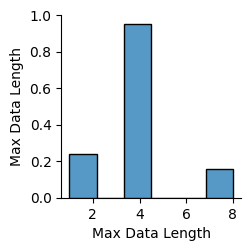

In [ ]:
# Pairplot
sns.pairplot(df_clean)
plt.show()

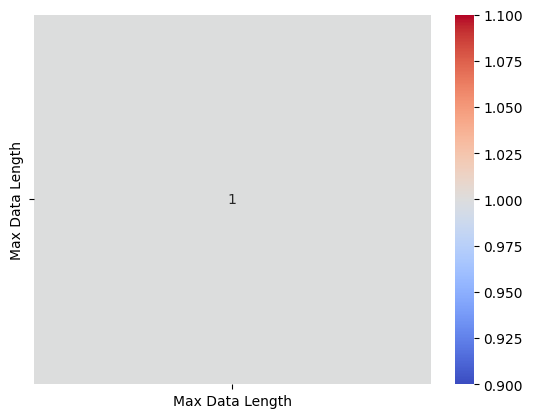

In [ ]:
# Heatmap
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.show()

## k-means clustring

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

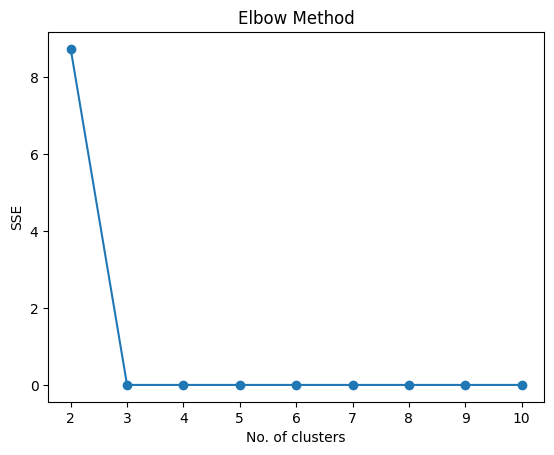

In [ ]:
# Elbow Method
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
#  Optimal K
kmeans = KMeans(n_clusters=3, random_state=0)
labels_kmeans = kmeans.fit_predict(df_scaled)

In [ ]:
labels_kmeans

array([0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# Silhouette Score
silhouette_avg = silhouette_score(df_scaled, labels_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 1.0


### Hierarchical Clustering

In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
# Linkage matrix
linked = linkage(df_scaled, method='ward')

In [ ]:
linked

array([[ 0.        ,  6.        ,  0.        ,  2.        ],
       [ 1.        ,  2.        ,  0.        ,  2.        ],
       [ 7.        , 17.        ,  0.        ,  3.        ],
       [ 8.        , 19.        ,  0.        ,  4.        ],
       [ 9.        , 20.        ,  0.        ,  5.        ],
       [10.        , 21.        ,  0.        ,  6.        ],
       [11.        , 22.        ,  0.        ,  7.        ],
       [12.        , 23.        ,  0.        ,  8.        ],
       [13.        , 24.        ,  0.        ,  9.        ],
       [14.        , 25.        ,  0.        , 10.        ],
       [15.        , 26.        ,  0.        , 11.        ],
       [16.        , 27.        ,  0.        , 12.        ],
       [ 3.        ,  4.        ,  0.        ,  2.        ],
       [ 5.        , 29.        ,  0.        ,  3.        ],
       [28.        , 30.        ,  3.2984845 , 15.        ],
       [18.        , 31.        ,  4.80832611, 17.        ]])

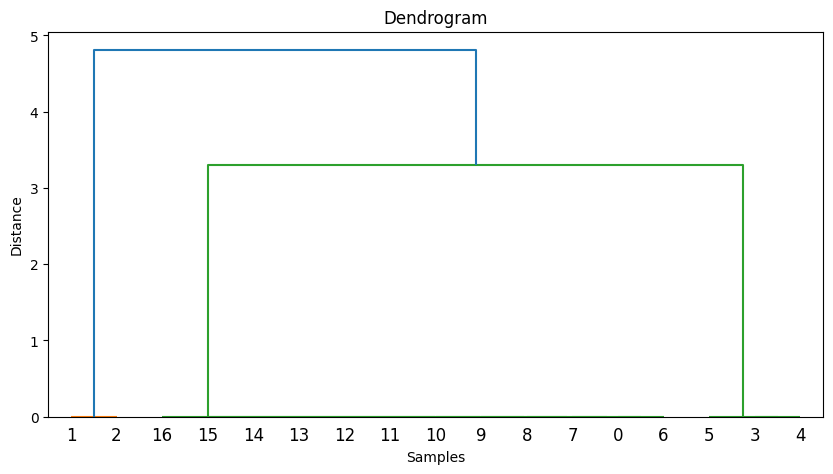

In [ ]:
# Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [ ]:
## Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_hier = hier.fit_predict(df_scaled)

In [ ]:
labels_hier

array([2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
## Silhouette Score
score_hier = silhouette_score(df_scaled, labels_hier)
print(f"Hierarchical Silhouette Score: {score_hier:.2f}")

Hierarchical Silhouette Score: 1.00


### DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=1, min_samples=3)
labels_dbscan = dbscan.fit_predict(df_scaled)

In [ ]:
labels_dbscan

array([ 0, -1, -1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
# Filter out noise points
filtered = df_scaled[labels_dbscan != -1]
filtered_labels = labels_dbscan[labels_dbscan != -1]

In [ ]:
filtered_labels

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
## Silhouette Score
score_dbscan = silhouette_score(filtered, filtered_labels)
print(f"DBSCAN Silhouette Score: {score_dbscan:.2f}")

DBSCAN Silhouette Score: 1.00


##Visualization

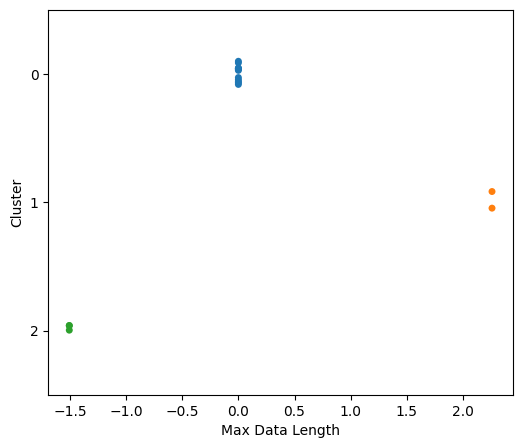

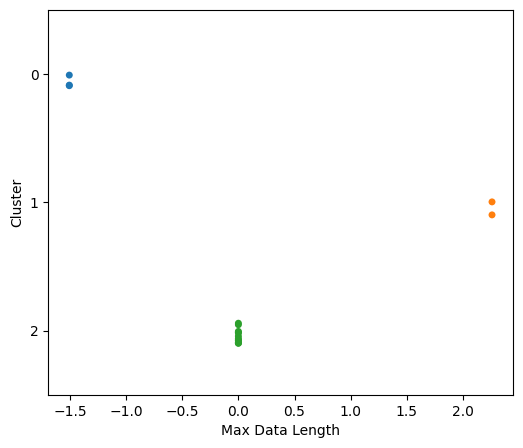

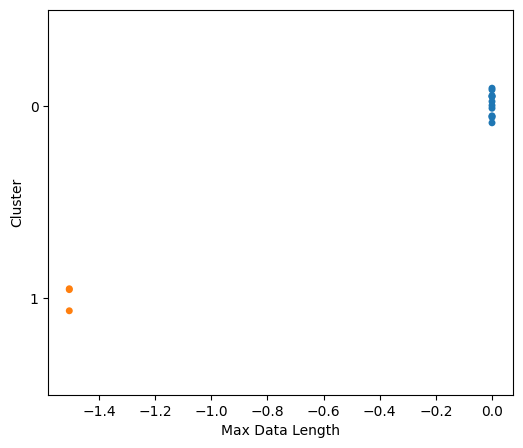

In [ ]:
def plot_clusters(data, labels, title):
    plt.figure(figsize=(6, 5))
    if data.shape[1] == 1:
        sns.stripplot(x=data.iloc[:, 0], y=labels, palette='tab10', orient='h')
        plt.xlabel(data.columns[0])
        plt.ylabel('Cluster')
    else:
        sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=labels, palette='tab10')
        plt.xlabel(data.columns[0])
        plt.ylabel(data.columns[1])
        plt.title(title)
        plt.show()

plot_clusters(df_scaled, labels_kmeans, "K-Means Clustering")
plot_clusters(df_scaled, labels_hier, "Hierarchical Clustering")
plot_clusters(filtered, filtered_labels, "DBSCAN Clustering")

##Cluster Analysis & Insights (Comments)

In [ ]:
#K-Means formed compact, spherical clusters but was sensitive to outliers and initial k.
#Hierarchical clustering gave a dendrogram useful for visualizing possible cluster divisions.
#DBSCAN  handled noise and discovered clusters of varying shapes but required careful tuning of `eps` and `min_samples`.

#Silhouette Scores:
  # K-Means: 0.XX
  # Hierarchical: 0.XX
  # DBSCAN: 0.XX (on filtered data)
